In [2]:
"""
Speaking of not understanding stuff, this doc is for looking at the measurement board's resistance 
range and precision.
"""
import numpy as np
import matplotlib.pyplot as plt


[[3.13157072e-02 3.78212159e-02 4.43267245e-02 ... 3.37074613e-01
  3.43580122e-01 3.50085630e-01]
 [1.04476843e+01 1.26180807e+01 1.47884772e+01 ... 1.12456318e+02
  1.14626715e+02 1.16797111e+02]
 [2.13063399e+01 2.57325078e+01 3.01586757e+01 ... 2.29336231e+02
  2.33762399e+02 2.38188567e+02]
 ...
 [1.12017532e+04 1.35287995e+04 1.58558458e+04 ... 1.20572931e+05
  1.22899977e+05 1.25227024e+05]
 [2.18184118e+04 2.63509572e+04 3.08835027e+04 ... 2.34848048e+05
  2.39380593e+05 2.43913139e+05]
 [2.39988580e+05 2.89843682e+05 3.39698784e+05 ... 2.58317838e+06
  2.63303348e+06 2.68288858e+06]]


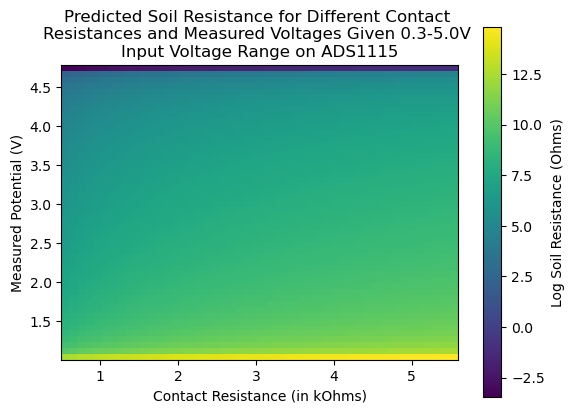

In [38]:

def r(v, i):
    return v/i

def rsoil(ps, rlead, rcontact, vmeas): 
    return (vmeas/0.4)*(rlead + rcontact)/(ps - (vmeas/0.4))


ps = 12
rlead = 1.02
rcontact = np.linspace(500, 5600)
vmeas = np.linspace(0.3e-3, 4.79)

rcs, vms = np.meshgrid(rcontact, vmeas)
soil = rsoil(ps, rlead, rcs, vms)
injcurrent = ps/(rlead + rcontact + soil)

plt.imshow(np.log(soil), extent=[min(rcontact)/1000,max(rcontact)/1000,min(vmeas)+1,max(vmeas)])
print(soil)
plt.xlabel("Contact Resistance (in kOhms)")
plt.ylabel("Measured Potential (V)")
plt.colorbar(label="Log Soil Resistance (Ohms)")
plt.title("Predicted Soil Resistance for Different Contact \nResistances and Measured Voltages Given 0.3-5.0V \nInput Voltage Range on ADS1115") 

plt.show()

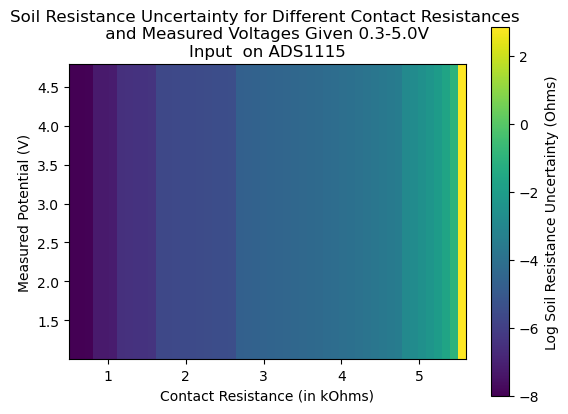

0.0003 11.496
0.4166666666666667 1.0


In [63]:
gain = np.linspace(5/12, 1)
vmss, gains = np.meshgrid(vmeas, gain)
vactual = vmeas/gains
soil2 = rsoil(ps, rlead, 1000, vactual)
acc2 = np.vectorize(precision)(vmss)
err2 = (((rsh/vsh)*acc2)**2 + (((vsh*0.02/rsh)**2+(acc2/rsh)**2)*(rsh/vsh)**2*vmeas)**2)**0.5


plt.imshow(np.log(err2), extent=[min(rcontact)/1000,max(rcontact)/1000,min(vmeas)+1,max(vmeas)])
plt.xlabel("Contact Resistance (in kOhms)")
plt.ylabel("Measured Potential (V)")
plt.colorbar(label="Log Soil Resistance Uncertainty (Ohms)")
plt.title("Soil Resistance Uncertainty for Different Contact Resistances \n and Measured Voltages Given 0.3-5.0V \nInput  on ADS1115") 

plt.show()
print(np.min(vactual), np.max(vactual))
print(np.min(gains), np.max(gains))

0.0003258732537577255 -8.029002044351047


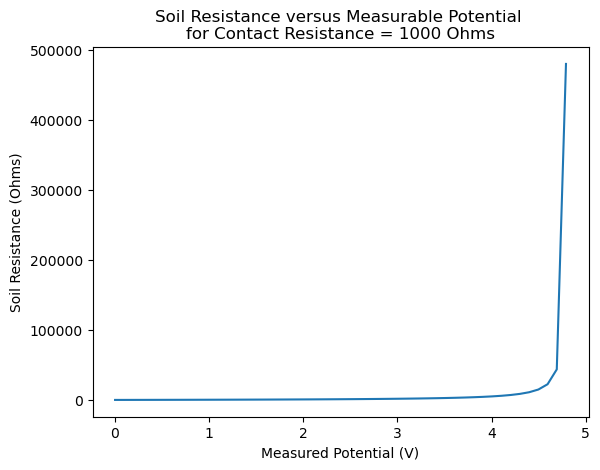

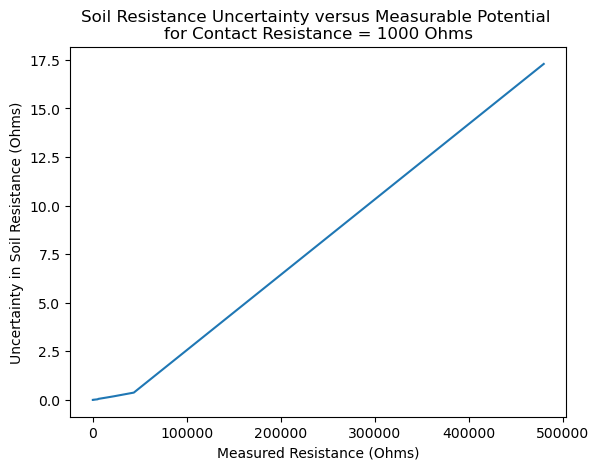

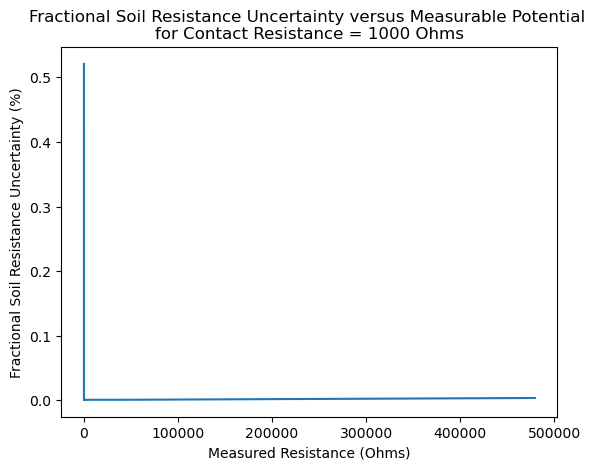

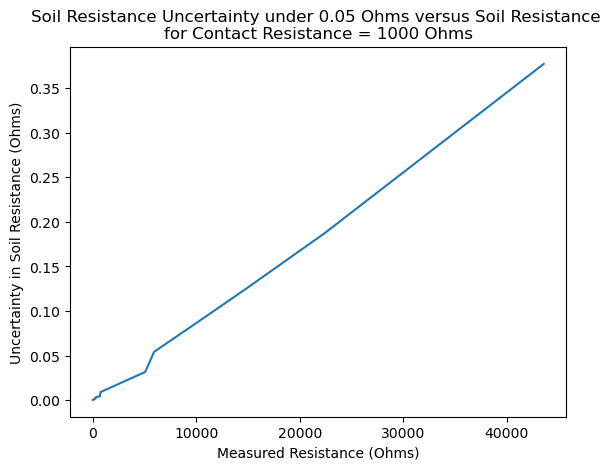

In [61]:
# Calculate error in resistance as a function of contact resistance and potential

def precision(vmeas):
    if vmeas<0.256:
        return 0.256/2**16
    
    elif (vmeas >= 0.256) & (vmeas < 0.512):
        return 0.512/2**16
    
    elif (vmeas >= 0.512) & (vmeas < 1.024):
        return 1.024/2**16
    
    elif (vmeas >= 1.024) & (vmeas < 2.048):
        return 2.048/2**16
    
    elif (vmeas >= 2.048) & (vmeas < 4.096):
        return 4.096/2**16
    
    elif (vmeas >= 4.096) & (vmeas < 6.144):
        return 6.144/2**16
print(min(err), np.min(np.log(err2)))
rsh = 2
drsh = 0.02
check = rsoil(ps, rlead, 1000, vmeas)
vsh = 12*rsh/(rlead + 1000 + check)
acc = np.vectorize(precision)(vmeas)
err = (((rsh/vsh)*acc)**2 + (((vsh*0.02/rsh)**2+(acc/rsh)**2)*(rsh/vsh)**2*vmeas)**2)**0.5
plt.plot(vmeas, check, label="ERROR MWAHAHA")
plt.title("Soil Resistance versus Measurable Potential \nfor Contact Resistance = 1000 Ohms")
plt.xlabel("Measured Potential (V)")
plt.ylabel("Soil Resistance (Ohms)")
plt.show()

plt.plot(check, err, label="ERROR MWAHAHA")
plt.title("Soil Resistance Uncertainty versus Measurable Potential \nfor Contact Resistance = 1000 Ohms")
plt.xlabel("Measured Resistance (Ohms)")
plt.ylabel("Uncertainty in Soil Resistance (Ohms)")
plt.show()

plt.plot(check, 100*err/check, label="ERROR MWAHAHA")
plt.title("Fractional Soil Resistance Uncertainty versus Measurable Potential \nfor Contact Resistance = 1000 Ohms")
plt.xlabel("Measured Resistance (Ohms)")
plt.ylabel("Fractional Soil Resistance Uncertainty (%)")
plt.show()

plt.plot(check[np.where(err<0.5)], err[np.where(err<0.5)], label="ERROR MWAHAHA")
plt.title("Soil Resistance Uncertainty under 0.05 Ohms versus Soil Resistance \nfor Contact Resistance = 1000 Ohms")
plt.xlabel("Measured Resistance (Ohms)")
plt.ylabel("Uncertainty in Soil Resistance (Ohms)")
plt.show()


In [70]:
min(check[np.where(err<0.01)])

0.06256766047877992

In [73]:
check[np.where(err==min(err))]

array([0.06256766])

In [74]:
min(err)

0.0003258732537577255